In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_excel(r'C:\Users\Asus\Downloads\Online Retail.xlsx',engine='openpyxl')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df.shape

(541909, 8)

In [16]:
df2=df[['Country','CustomerID']]
df2

,Country,CustomerID
0,United Kingdom,17850.0
1,United Kingdom,17850.0
2,United Kingdom,17850.0
3,United Kingdom,17850.0
4,United Kingdom,17850.0
...,...,...
541904,France,12680.0
541905,France,12680.0
541906,France,12680.0
541907,France,12680.0


In [18]:
df3=df2.drop_duplicates()
df3

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [20]:
df3.groupby(['Country'])['CustomerID'].agg('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [21]:
df=df.query("Country=='United Kingdom'").reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [22]:
df['Country'].unique()

array(['United Kingdom'], dtype=object)

In [23]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [24]:
cust_df=df[pd.notnull(df['CustomerID'])]
cust_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [26]:
cust_df.Quantity.min()

-80995

In [27]:
cust_df.UnitPrice.min()

0.0

In [28]:
cust_df=cust_df[(cust_df['Quantity']>0)]
cust_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [30]:
cust_df['InvoiceDate']=pd.to_datetime(cust_df['InvoiceDate'])
cust_df['InvoiceDate']

D:\SEM 4\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
495473   2011-12-09 12:31:00
495474   2011-12-09 12:49:00
495475   2011-12-09 12:49:00
495476   2011-12-09 12:49:00
495477   2011-12-09 12:49:00
Name: InvoiceDate, Length: 354345, dtype: datetime64[ns]

In [33]:
cust_df['TotalAmount']=cust_df['Quantity']*cust_df['UnitPrice']
cust_df.head()

D:\SEM 4\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# RFM Modelling

In [34]:
import datetime as dt
cust_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [37]:
latest_date=dt.datetime(2011,12,10)
#1st one to define Recency
#2nd one to define Frequency
#3rd one to define Monetary
RFM=cust_df.groupby('CustomerID').agg({'InvoiceDate': lambda x:(latest_date-x.max()).days,'InvoiceNo': lambda x:len(x),'TotalAmount': lambda x:x.sum()})
RFM['InvoiceDate']=RFM['InvoiceDate'].astype(int)
RFM.rename(columns={'InvoiceDate':'Recency',
                   'InvoiceNo':'Frequency',
                   'TotalAmount':'Monetary'},inplace=True)
RFM.reset_index()
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [38]:
RFM.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


In [39]:
import seaborn as sns
sns.set()

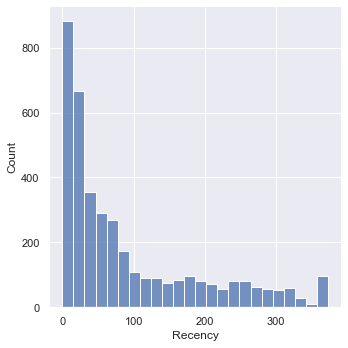

In [40]:
x=RFM['Recency']
ax=sns.displot(x)

In [43]:
RFM.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

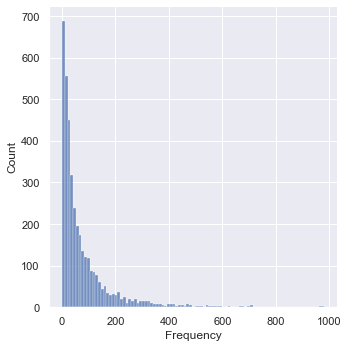

In [41]:
x_freq=RFM.query('Frequency<1000')['Frequency']
ax=sns.displot(x_freq)

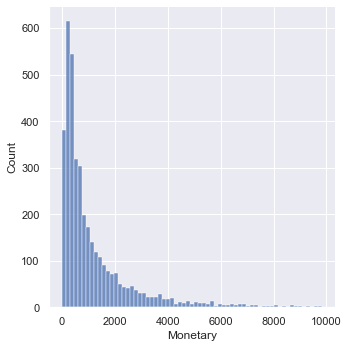

In [46]:
x_monetary=RFM.query('Monetary <10000')['Monetary']
ax=sns.displot(x_monetary)

In [48]:
quantile=RFM.quantile(q=[0.25,0.5,0.75])
quantile=quantile.to_dict()
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [49]:
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [56]:
RFM['R'] = RFM['Recency'].apply(RScore,args=('Recency',quantile,))
RFM['F'] = RFM['Frequency'].apply(FMScore,args=('Frequency',quantile,))
RFM['M'] = RFM['Monetary'].apply(FMScore,args=('Monetary',quantile,))
RFM.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [58]:
#Calculate & Add RFMGroup value column showing combined concatenated score of all RFM
RFM['RFMGroup']=RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)

#Calculate & Add RFMScore value column showing total sum of RFMGroup values
RFM['RFMScore']=RFM[['R','F','M']].sum(axis=1)
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [59]:
loyalty=['New Stars','Fresh','Old Stars','Lost']
score_cuts=pd.qcut(RFM.RFMScore,q=4,labels=loyalty)
RFM['RFM_Loyalty_Level']= score_cuts.values
RFM.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Old Stars
1,12747.0,2,103,4196.01,1,1,1,111,3,New Stars
2,12748.0,0,4596,33719.73,1,1,1,111,3,New Stars
3,12749.0,3,199,4090.88,1,1,1,111,3,New Stars
4,12820.0,3,59,942.34,1,2,2,122,5,New Stars


In [61]:
#The Best Customer Group
#Biasanya ditawari Free shipping, Discounts
RFM[RFM['RFMGroup']=='111'].sort_values(['Monetary'],ascending=False)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
18102.0,0,431,259657.30,1,1,1,111,3,New Stars
17450.0,8,337,194550.79,1,1,1,111,3,New Stars
17511.0,2,963,91062.38,1,1,1,111,3,New Stars
16684.0,4,277,66653.56,1,1,1,111,3,New Stars
14096.0,4,5111,65164.79,1,1,1,111,3,New Stars
...,...,...,...,...,...,...,...,...,...
14759.0,4,102,1625.97,1,1,1,111,3,New Stars
16987.0,3,129,1625.05,1,1,1,111,3,New Stars
15172.0,8,110,1624.05,1,1,1,111,3,New Stars


In [69]:
RFM[RFM['RFMGroup']=='444'].sort_values(['Monetary'],ascending=False)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
15609.0,184,16,298.48,4,4,4,444,12,Lost
17678.0,263,16,298.11,4,4,4,444,12,Lost
12881.0,275,7,298.00,4,4,4,444,12,Lost
17531.0,190,14,296.70,4,4,4,444,12,Lost
13751.0,288,9,296.25,4,4,4,444,12,Lost
...,...,...,...,...,...,...,...,...,...
17102.0,261,1,25.50,4,4,4,444,12,Lost
15823.0,372,1,15.00,4,4,4,444,12,Lost
17763.0,263,1,15.00,4,4,4,444,12,Lost


In [62]:
RFM['RFM_Loyalty_Level']=='Lost'

CustomerID
12346.0    False
12747.0    False
12748.0    False
12749.0    False
12820.0    False
           ...  
18280.0     True
18281.0     True
18282.0    False
18283.0    False
18287.0    False
Name: RFM_Loyalty_Level, Length: 3921, dtype: bool

In [64]:
RFM_lost=RFM.query("RFM_Loyalty_Level=='Lost'").reset_index(drop=True)
RFM_lost

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,214,6,92.72,4,4,4,444,12,Lost
1,336,11,293.00,4,4,4,444,12,Lost
2,262,9,215.05,4,4,4,444,12,Lost
3,173,12,134.10,4,4,4,444,12,Lost
4,294,17,311.55,4,4,3,443,11,Lost
...,...,...,...,...,...,...,...,...,...
700,366,7,168.60,4,4,4,444,12,Lost
701,58,8,110.38,3,4,4,344,11,Lost
702,73,9,173.90,3,4,4,344,11,Lost
703,277,10,180.60,4,4,4,444,12,Lost


In [65]:
RFM_newstar=RFM.query("RFM_Loyalty_Level=='New Stars'").reset_index(drop=True)
RFM_newstar

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,2,103,4196.01,1,1,1,111,3,New Stars
1,0,4596,33719.73,1,1,1,111,3,New Stars
2,3,199,4090.88,1,1,1,111,3,New Stars
3,3,59,942.34,1,2,2,122,5,New Stars
4,2,91,1474.72,1,2,2,122,5,New Stars
...,...,...,...,...,...,...,...,...,...
1135,39,118,2337.63,2,1,1,211,4,New Stars
1136,24,42,2338.60,2,2,1,221,5,New Stars
1137,2,166,3078.58,1,1,1,111,3,New Stars
1138,3,756,2094.88,1,1,1,111,3,New Stars


In [66]:
RFM_fresh=RFM.query("RFM_Loyalty_Level=='Fresh'").reset_index(drop=True)
RFM_fresh

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,70,46,948.88,3,2,2,322,7,Fresh
1,74,5,1759.50,3,4,1,341,8,Fresh
2,5,25,430.15,1,3,3,133,7,Fresh
3,37,38,6814.64,2,3,1,231,6,Fresh
4,32,27,383.03,2,3,3,233,8,Fresh
...,...,...,...,...,...,...,...,...,...
1176,50,98,526.67,2,2,3,223,7,Fresh
1177,172,134,2643.20,4,1,1,411,6,Fresh
1178,43,21,324.24,2,3,3,233,8,Fresh
1179,25,61,1213.16,2,2,2,222,6,Fresh


In [68]:
RFM_oldstar=RFM.query("RFM_Loyalty_Level=='Old Stars'").reset_index(drop=True)
RFM_oldstar

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,325,1,77183.60,4,4,1,441,9,Old Stars
1,59,25,397.12,3,3,3,333,9,Old Stars
2,145,24,417.38,4,3,3,433,10,Old Stars
3,282,18,312.38,4,3,3,433,10,Old Stars
4,267,27,354.09,4,3,3,433,10,Old Stars
...,...,...,...,...,...,...,...,...,...
890,38,11,283.15,2,4,4,244,10,Old Stars
891,2,3,204.00,1,4,4,144,9,Old Stars
892,30,11,175.92,2,4,4,244,10,Old Stars
893,43,14,335.86,2,4,3,243,9,Old Stars


In [52]:
#def r_score(x):
    #if x <= quantile['Recency'][.2]:
        #return 1
    #elif x <= quantile['Recency'][.4]:
        #return 2
    #elif x <= quantile['Recency'][.6]:
        #return 3
    #elif x <= quantile['Recency'][.8]:
        #return 4
    #else:
        #return 5    
#def fm_score(x, c):
    #if x <= quantile[c][.2]:
        #return 1
    #elif x <= quantile[c][.4]:
        #return 2
    #elif x <= quantile[c][.6]:
        #return 3
    #elif x <= quantile[c][.8]:
        #return 4
    #else:
        #return 5    

KeyError: 0.2